<a href="https://colab.research.google.com/github/s6aamani/20_news_group/blob/master/machine_learning_challenge_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing packages
import sys
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd
import string
import matplotlib.pyplot as plt
import pickle
import os
import keras

from keras import backend as K
from pprint import pprint
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_20newsgroups
from wordcloud import WordCloud

Using TensorFlow backend.


In [2]:
#Importing data 
twenty_train = fetch_20newsgroups(subset='train', random_state = 42,shuffle=True) #, remove=('headers', 'footers', 'quotes'))
twenty_test = fetch_20newsgroups(subset='test', random_state = 42, shuffle=True) #, remove=('headers', 'footers', 'quotes'))

#Explanatory Data Analysis#

In [3]:
print("Categories names are:\n")
for i in twenty_train.target_names:
    print(i)
print("\n Total:{}".format(len(twenty_train.target_names)))

Categories names are:

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc

 Total:20


In [4]:
print("Length of the training data set is {}".format(len(twenty_train.data))) 
print("Length of the test data set is {}".format(len(twenty_test.data))) 
print("Length of the total dataset is {}".format(11314+7532))

Length of the training data set is 11314
Length of the test data set is 7532
Length of the total dataset is 18846


In [0]:
names = []
test_names = []
for i in twenty_train.target:
    names.append(twenty_train.target_names[i])
for i in twenty_test.target:
    test_names.append(twenty_test.target_names[i])

In [0]:
df_train = pd.DataFrame(data = np.c_[twenty_train.data,twenty_train.target,names] , columns = ("Text","Target_id","Target_name"))
df_test  = pd.DataFrame(data = np.c_[twenty_test.data,twenty_test.target,test_names] , columns = ("Text","Target","Target_name"))

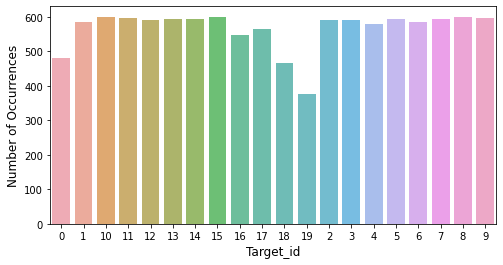

In [7]:
#Are the classes balanced? 
count_target = df_train['Target_id'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(count_target.index,  count_target.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Target_id', fontsize=12)
plt.show()

Above plot shows that the classes are little unbalanced. News reports from categories 'comp.graphics', 'talk.politics.misc' & 'talk.religion.misc' are fewer compared to other categories. 

# Examine the properties by target#

In [0]:
###Adding extra features 
def add_features(df):
    df['Length_of_text'] = df['Text'].apply(lambda x: len(str(x))) # length of each text
    df['unique'] = df['Text'].apply(lambda x: len(set(str(x)))) # Unique characters
    df['punctuations'] = df['Text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
    df['uniq_punctuations'] = df['Text'].apply(lambda x: len(set([c for c in str(x) if c in string.punctuation])))
    df['letters'] = df['Text'].apply(lambda x: len([c for c in str(x) if c.isalpha()])) 
    df['uniq_letters'] = df['Text'].apply(lambda x: len(set([c for c in str(x) if c.isalpha()])))
    df['numbers'] = df['Text'].apply(lambda x: len([c for c in str(x) if c.isdigit()]))
    df['uniq_numbers'] = df['Text'].apply(lambda x: len(set([c for c in str(x) if c.isdigit()])))
    df['uppercase'] = df['Text'].apply(lambda x: len([c for c in str(x) if c.isupper()]))
    df['uniq_uppercase'] = df['Text'].apply(lambda x: len(set([c for c in str(x) if c.isupper()])))
    df['lowercase'] = df['Text'].apply(lambda x: len([c for c in str(x) if c.islower()]))
    df['uniq_lowercase'] = df['Text'].apply(lambda x: len(set([c for c in str(x) if c.islower()])))

In [0]:
add_features(df_train)
add_features(df_test)

<Figure size 864x864 with 0 Axes>

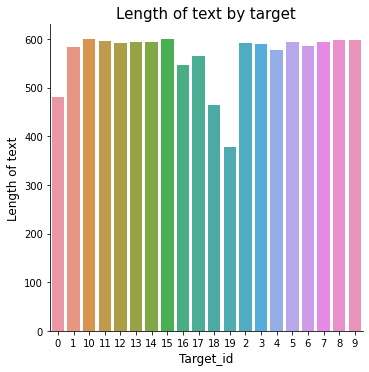

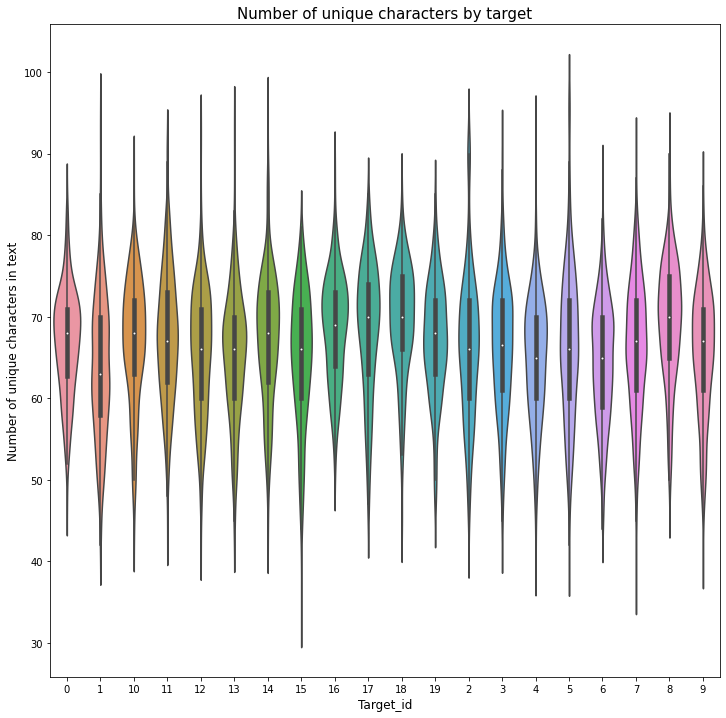

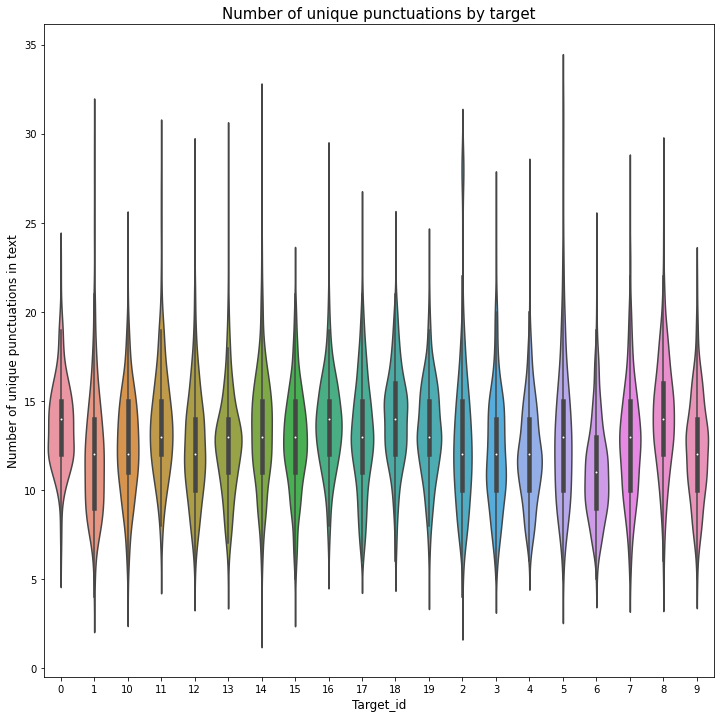

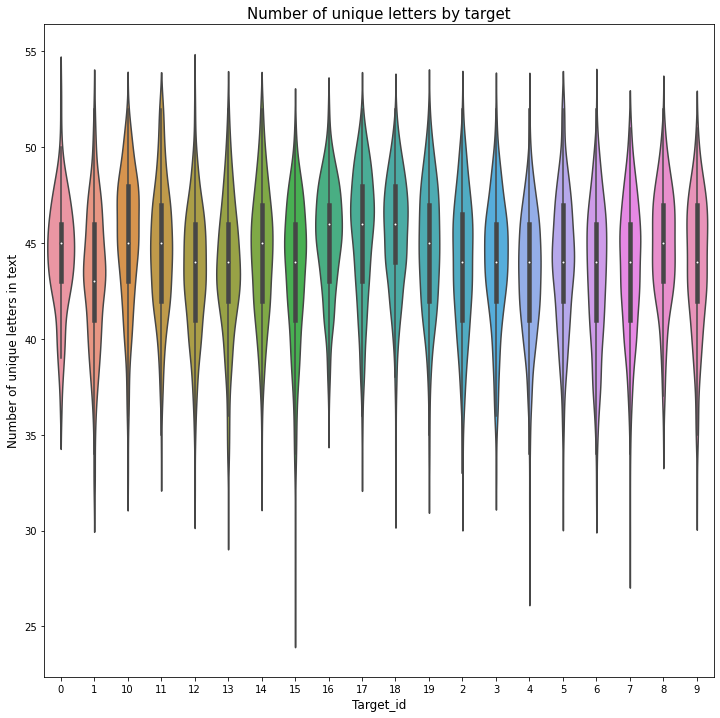

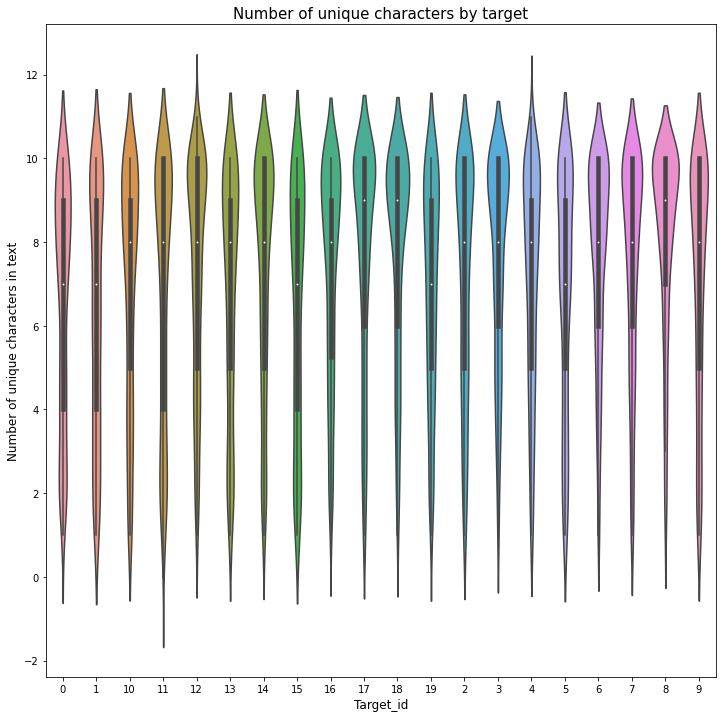

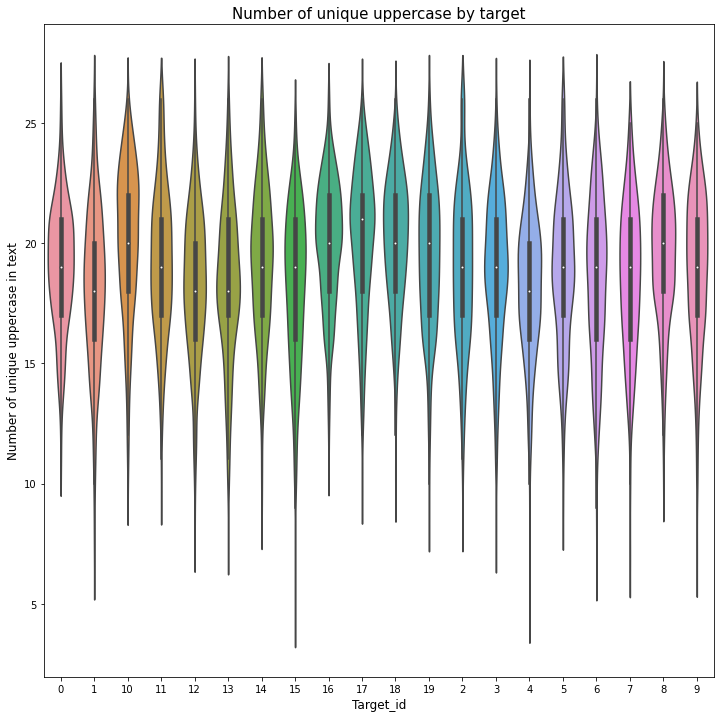

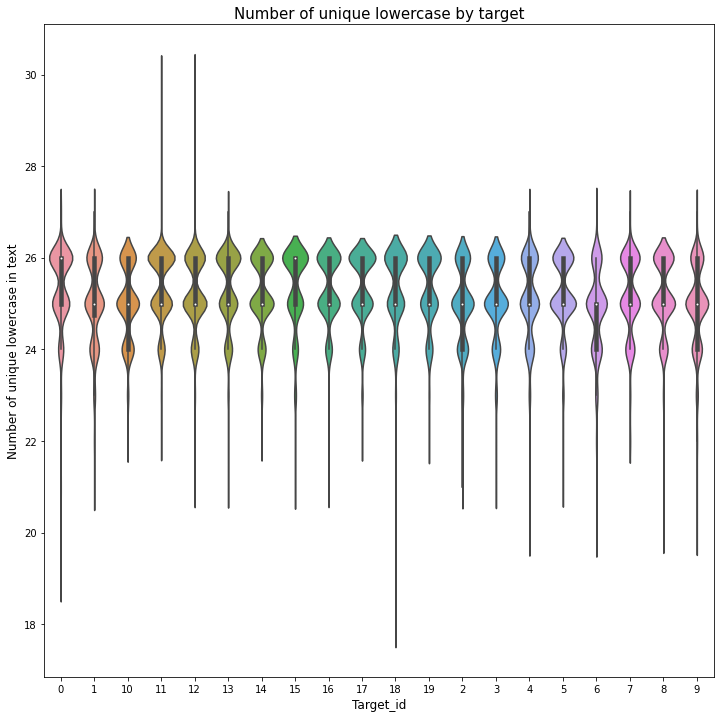

In [10]:
plt.figure(figsize=(12,12))
sns.catplot(x='Target_id', data=df_train,kind="count")
plt.xlabel('Target_id', fontsize=12)
plt.ylabel('Length of text', fontsize=12)
plt.title("Length of text by target", fontsize=15)
plt.show()
###########
plt.figure(figsize=(12,12))
sns.violinplot(x='Target_id', y='unique', data=df_train)
plt.xlabel('Target_id', fontsize=12)
plt.ylabel('Number of unique characters in text', fontsize=12)
plt.title("Number of unique characters by target", fontsize=15)
plt.show()
###########
plt.figure(figsize=(12,12))
sns.violinplot(x='Target_id', y='uniq_punctuations', data=df_train)
plt.xlabel('Target_id', fontsize=12)
plt.ylabel('Number of unique punctuations in text', fontsize=12)
plt.title("Number of unique punctuations by target", fontsize=15)
plt.show()
###########
plt.figure(figsize=(12,12))
sns.violinplot(x='Target_id', y='uniq_letters', data=df_train)
plt.xlabel('Target_id', fontsize=12)
plt.ylabel('Number of unique letters in text', fontsize=12)
plt.title("Number of unique letters by target", fontsize=15)
plt.show()
###########
plt.figure(figsize=(12,12))
sns.violinplot(x='Target_id', y='uniq_numbers', data=df_train)
plt.xlabel('Target_id', fontsize=12)
plt.ylabel('Number of unique characters in text', fontsize=12)
plt.title("Number of unique characters by target", fontsize=15)
plt.show()
###########
plt.figure(figsize=(12,12))
sns.violinplot(x='Target_id', y='uniq_uppercase', data=df_train)
plt.xlabel('Target_id', fontsize=12)
plt.ylabel('Number of unique uppercase in text', fontsize=12)
plt.title("Number of unique uppercase by target", fontsize=15)
plt.show()
###########
plt.figure(figsize=(12,12))
sns.violinplot(x='Target_id', y='uniq_lowercase', data=df_train)
plt.xlabel('Target_id', fontsize=12)
plt.ylabel('Number of unique lowercase in text', fontsize=12)
plt.title("Number of unique lowercase by target", fontsize=15)
plt.show()
###########

In [11]:
print("Printing first post to explore \n")
print("\n".join(df_train['Text'][0].split("\n")[:])) #prints first line of the first data file
print("\n Above post belongs to {}".format(df_train.Target_name[0]))

Printing first post to explore 

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----






 Above post belongs to rec.autos


In [12]:
df_train.columns

Index(['Text', 'Target_id', 'Target_name', 'Length_of_text', 'unique',
       'punctuations', 'uniq_punctuations', 'letters', 'uniq_letters',
       'numbers', 'uniq_numbers', 'uppercase', 'uniq_uppercase', 'lowercase',
       'uniq_lowercase'],
      dtype='object')

# Cleaning text

In [0]:
from gensim import utils
import gensim.parsing.preprocessing as gsp

filters = [
           gsp.strip_tags,  #Unicode string without tags.
           gsp.strip_punctuation, #Unicode string without punctuation characters.
           gsp.strip_multiple_whitespaces, #Unicode string without repeating in a row whitespace characters.
           gsp.strip_numeric, #Unicode string without digits.
           gsp.remove_stopwords, #Unicode string without STOPWORDS.
           gsp.strip_short, #Unicode string without short words.
           #gsp.stem_text #Unicode lowercased and porter-stemmed version of string text.
          ]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

df_train['Text'] = df_train['Text'].apply(clean_text)
df_test['Text'] = df_test['Text'].apply(clean_text)

In [14]:
########################
def show_top10(classifier, vectorizer, categories):
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(categories):
        top10 = np.argsort(classifier.coef_[i])[-10:]
        print("{}: {}".format(category, " ".join(feature_names[top10])))
######################
vectorizer = TfidfVectorizer() #vectorizer
vectors = vectorizer.fit_transform(df_train.Text)
clf = MultinomialNB(alpha=.01) #classifier
clf.fit(vectors, twenty_train.target)
print("Number of features in the datset are {} \n \n".format(np.shape(vectors)[1])) 

#########################
print("Display first 10 features for each category \n")
show_top10(clf, vectorizer, twenty_train.target_names)

Number of features in the datset are 84113 
 

Display first 10 features for each category 

alt.atheism: atheists islam writes livesey morality people atheism edu god keith
comp.graphics: thanks organization polygon subject university lines files image edu graphics
comp.os.ms-windows.misc: card com drivers driver files win dos file edu windows
comp.sys.ibm.pc.hardware: disk dos edu controller com bus card ide drive scsi
comp.sys.mac.hardware: scsi lines monitor simms centris quadra drive edu apple mac
comp.windows.x: sun application xterm widget edu com mit server motif window
misc.forsale: subject distribution lines condition university new shipping offer edu sale
rec.autos: organization subject oil writes engine article edu com cars car
rec.motorcycles: bmw writes motorcycle bikes article ride edu com dod bike
rec.sport.baseball: writes article runs games players game team year baseball edu
rec.sport.hockey: leafs games season players play edu nhl game team hockey
sci.crypt: crypto 

We can see that, all the features are only words. 

# Exploring data using word cloud

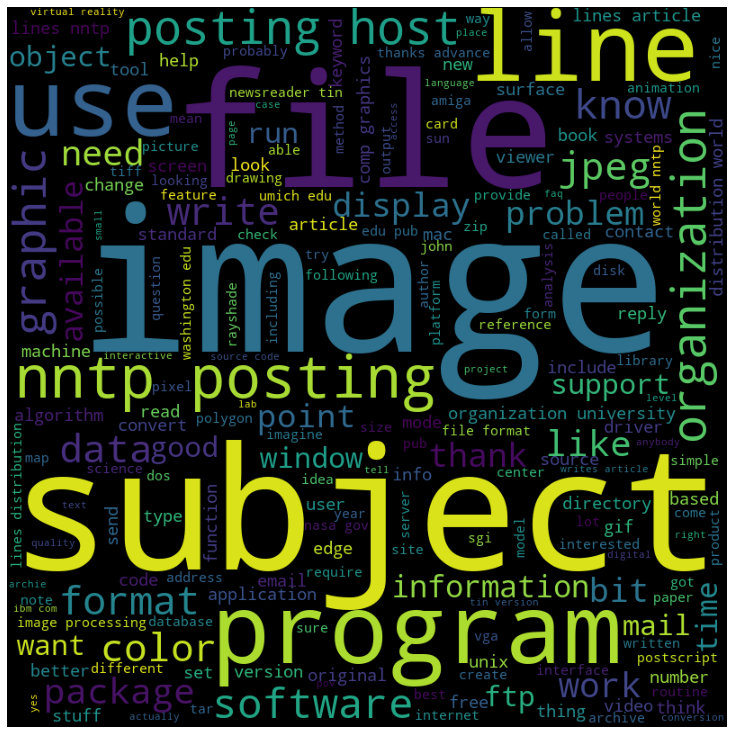

In [15]:
def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords='english',
                min_font_size = 5).generate(text) 
             
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud_instance) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

def plot_word_cloud_for_cat(category):
    text_df = df_train.loc[df_train['Target_name'] == str(category)]
    texts = ''
    for index, item in text_df.iterrows():
        texts = texts + ' ' + clean_text(item['Text'])
    plot_word_cloud(texts)

plot_word_cloud_for_cat('comp.graphics')

# Multi-nominal Naive bayesian classifier

In [16]:
#Multi-nominal Naive bayesian classifier
mulit_nb_clf = Pipeline([
      ('vect', CountVectorizer(stop_words='english')),
      ('tfidf', TfidfTransformer()),
      ('clf', MultinomialNB(fit_prior=False)), 
            ])

parameters = {'vect__max_df': (0.5,0.75,1.0),
              'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3)}

gs_clf = GridSearchCV(mulit_nb_clf, parameters,n_jobs=-1)
gs_clf = gs_clf.fit(df_train.Text,df_train.Target_id)

# save the model to disk
filename = 'mulit_nb_clf.sav'
pickle.dump(gs_clf, open(filename, 'wb'))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [17]:
filename = 'mulit_nb_clf.sav'
# load the model from disk
#gs_clf = pickle.load(open(filename, 'rb'))

predicted = gs_clf.predict(df_test.Text)
print("Accuracy using Naive Bayes Classifier, with help of gridsearch is {} %".format(np.mean(predicted == df_test.Target)*100)) 

Accuracy using Naive Bayes Classifier, with help of gridsearch is 82.95273499734466 %


In [18]:
gs_clf.best_score_ # mean cross-validated score of the estimator on the training dataset
gs_clf.best_params_

{'clf__alpha': 0.001,
 'tfidf__use_idf': False,
 'vect__max_df': 0.75,
 'vect__ngram_range': (1, 2)}

In [19]:
#linear SVM
sgd_clf = Pipeline([
      ('vect', CountVectorizer(stop_words='english')),
      ('tfidf', TfidfTransformer()),
      ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',random_state=42)), 
            ])
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf-svm__alpha': (1e-2, 1e-3)}
sgd_clf = GridSearchCV(sgd_clf, parameters,n_jobs=-1)
sgd_clf = sgd_clf.fit(df_train.Text,df_train.Target_id)

filename = 'sgd_clf.sav'
pickle.dump(sgd_clf, open(filename, 'wb'))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [0]:
filename = 'sgd_clf.sav'
# load the model from disk
#sgd_clf = pickle.load(open(filename, 'rb'))

predicted = sgd_clf.predict(df_test.Text)

In [21]:
sgd_clf.best_score_

0.9021571406077784

In [22]:
print("Accuracy using SGDClassifier, on test datset is {} %".format(np.mean(predicted == df_test.Target)*100))

Accuracy using SGDClassifier, on test datset is 83.04567180031864 %


In [23]:
###SVC
from sklearn import svm
svc_clf = Pipeline([
      ('vect', CountVectorizer(stop_words='english')),
      ('tfidf', TfidfTransformer()),
      ('svc_clf', svm.SVC()), 
            ])

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False)}
svc_clf = GridSearchCV(svc_clf, parameters,n_jobs=-1)

svc_clf = svc_clf.fit(df_train.Text,df_train.Target_id)

filename = 'svc_clf.sav'
pickle.dump(svc_clf, open(filename, 'wb'))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [0]:
filename = 'svc_clf.sav'
# load the model from disk
#svc_clf = pickle.load(open(filename, 'rb'))

predicted = svc_clf.predict(df_test.Text)

In [25]:
print("Accuracy using SVC Classifier, on test datset is {} %".format(np.mean(predicted == df_test.Target)*100))

Accuracy using SVC Classifier, on test datset is 82.03664365374402 %


In [0]:
###random forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline([
      ('vect', CountVectorizer(stop_words='english')),
      ('tfidf', TfidfTransformer(use_idf=True)),
      ('clf_rf', RandomForestClassifier(n_estimators=100, 
                               random_state=46, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)), 
            ])

In [27]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)]}
rf_clf = GridSearchCV(rf_clf, parameters,n_jobs=-1)
rf_clf = rf_clf.fit(df_train.Text,df_train.Target_id)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   59.1s finished


In [28]:

filename = 'rf_clf.sav'
pickle.dump(rf_clf, open(filename, 'wb'))
# load the model from disk
#rf_clf = pickle.load(open(filename, 'rb'))

predicted = rf_clf.predict(df_test.Text)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished


In [29]:
print("Accuracy using random forest Classifier, with help of gridsearch is {} %".format(np.mean(predicted == df_test.Target)*100)) 

Accuracy using random forest Classifier, with help of gridsearch is 78.62453531598513 %


In [0]:
# plot_word_cloud_for_cat('rec.sport.hockey') 
# plot_word_cloud_for_cat('rec.motorcycles') 

###Bert Model###

In [31]:
!pip install keras-bert
!pip install keras-rectified-adam

!wget -q https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!unzip -o uncased_L-12_H-768_A-12.zip


  Created wheel for keras-bert: filename=keras_bert-0.81.0-cp36-none-any.whl size=37913 sha256=6a4526e94b0b6d9adb8665e745531a1e4d82a24633852590abc5e679c8820519
  Stored in directory: /root/.cache/pip/wheels/bd/27/da/ffc2d573aa48b87440ec4f98bc7c992e3a2d899edb2d22ef9e
  Created wheel for keras-transformer: filename=keras_transformer-0.32.0-cp36-none-any.whl size=13266 sha256=c53e908aac18579ad5f4ed12f8cefc87f0b80f7c7f2d32bed12be4e1e32e5b01
  Stored in directory: /root/.cache/pip/wheels/62/f0/ce/82fa5d024d5ef8e263f26a50dcee23820efe245680ce9c922a
  Created wheel for keras-pos-embd: filename=keras_pos_embd-0.11.0-cp36-none-any.whl size=7554 sha256=256535e750c4c24c4b1f45e47d288a1dd4fc095adaec42b49ad53b68f5354043
  Stored in directory: /root/.cache/pip/wheels/5b/a1/a0/ce6b1d49ba1a9a76f592e70cf297b05c96bc9f418146761032
  Created wheel for keras-multi-head: filename=keras_multi_head-0.22.0-cp36-none-any.whl size=15371 sha256=2b7bd638ddeccaf0477d7b97cc0c5c4d0ebf976cf0a0847fbaf77dc3ad5b5fee
  Stor

In [0]:
from keras_radam import RAdam
from keras_bert import load_trained_model_from_checkpoint

In [0]:
SEQ_LEN = 128
BATCH_SIZE = 50
EPOCHS = 7
LR = 1e-4

In [0]:
pretrained_path = 'uncased_L-12_H-768_A-12'
config_path = os.path.join(pretrained_path, 'bert_config.json')
checkpoint_path = os.path.join(pretrained_path, 'bert_model.ckpt')
vocab_path = os.path.join(pretrained_path, 'vocab.txt')

In [35]:
model = load_trained_model_from_checkpoint(
      config_path,
      checkpoint_path,
      training=True,
      trainable=True,
      seq_len=SEQ_LEN,
  )





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.









In [0]:
import codecs
from keras_bert import Tokenizer
token_dict = {}
with codecs.open(vocab_path, 'r', 'utf8') as reader:
    for line in reader:
        token = line.strip()
        token_dict[token] = len(token_dict)

#print(token_dict)

In [0]:
tokenizer = Tokenizer(token_dict)

In [38]:
df_train.Text

0        lerxst wam umd edu thing subject car nntp post...
1        guykuo carson washington edu guy kuo subject c...
2        twillis ecn purdue edu thomas willis subject q...
3        jgreen amber joe green subject weitek organiza...
4        jcm head cfa harvard edu jonathan mcdowell sub...
                               ...                        
11309    jim zisfein factory com jim zisfein subject mi...
11310    ebodin pearl tufts edu subject screen death ma...
11311    westes netcom com estes subject mounting cpu c...
11312    steve hcrlgw steven collins subject sphere poi...
11313    gunning cco caltech edu kevin gunning subject ...
Name: Text, Length: 11314, dtype: object

In [0]:
n = 0
for row in df_train.itertuples():
  if n == 0:
    train_ids, segments = tokenizer.encode(row.Text, max_len=SEQ_LEN)
    n = n + 1
  else:
    ids, segments = tokenizer.encode(row.Text, max_len=SEQ_LEN)
    train_ids = np.vstack((train_ids,ids))    
    
# def encode(text): 
#  ids, segments = tokenizer.encode(text, max_len=SEQ_LEN)
#  ids = np.array(ids)
#  return ids.values

#df['col_3'] = df.apply(lambda x: f(x.col_1, x.col_2), axis=1)

#df_train_ids = df_train.apply(lambda x: encode(x.Text),axis=1)
#df_test_ids = df_test.apply(lambda x: encode(x.Text),axis=1)

In [0]:
n = 0
for row in df_test.itertuples():
  if n == 0:
    test_ids, segments = tokenizer.encode(row.Text, max_len=SEQ_LEN)
    n = n + 1
  else:
    ids, segments = tokenizer.encode(row.Text, max_len=SEQ_LEN)
    test_ids = np.vstack((test_ids,ids))   

In [41]:
train_ids.shape

(11314, 128)

In [0]:
mod_train = len(train_ids)%BATCH_SIZE
mod_test  = len(test_ids)%BATCH_SIZE
if mod_train > 0:
    indices_train, sentiments_train = train_ids[:-mod_train], df_train.Target_id[:-mod_train]
if mod_test > 0:
    indices_test, sentiments_test = test_ids[:-mod_test], df_test.Target[:-mod_test]
train_x, train_y, test_x, test_y = [indices_train, np.zeros_like(indices_train)], np.array(sentiments_train),[indices_test, np.zeros_like(indices_test)], np.array(sentiments_test)

In [43]:
len(train_x)

2

In [44]:
inputs = model.inputs[:2]
dense = model.get_layer('NSP-Dense').output
outputs = keras.layers.Dense(units=20, activation='softmax')(dense)

model = keras.models.Model(inputs, outputs)
model.compile(
  RAdam(learning_rate =LR),
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'],
)


In [45]:
sess = K.get_session()
uninitialized_variables = set([i.decode('ascii') for i in sess.run(tf.report_uninitialized_variables())])
init_op = tf.variables_initializer(
    [v for v in tf.global_variables() if v.name.split(':')[0] in uninitialized_variables]
)
sess.run(init_op)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [46]:
model.fit(
    train_x,
    train_y,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
)



Epoch 1/7
11300/11300 [==============================] - 187s 17ms/step - loss: 1.5902 - sparse_categorical_accuracy: 0.5270
Epoch 2/7
11300/11300 [==============================] - 166s 15ms/step - loss: 0.4639 - sparse_categorical_accuracy: 0.8598
Epoch 3/7
11300/11300 [==============================] - 166s 15ms/step - loss: 0.2314 - sparse_categorical_accuracy: 0.9319
Epoch 4/7
11300/11300 [==============================] - 166s 15ms/step - loss: 0.1355 - sparse_categorical_accuracy: 0.9584
Epoch 5/7
11300/11300 [==============================] - 166s 15ms/step - loss: 0.0986 - sparse_categorical_accuracy: 0.9714
Epoch 6/7
11300/11300 [==============================] - 166s 15ms/step - loss: 0.0809 - sparse_categorical_accuracy: 0.9749
Epoch 7/7
11300/11300 [==============================] - 166s 15ms/step - loss: 0.0614 - sparse_categorical_accuracy: 0.9806


In [47]:
predicts = model.predict(test_x, verbose=True).argmax(axis=-1)

7500/7500 [==============================] - 36s 5ms/step


In [0]:
test_y = test_y.astype(np.float)

In [49]:
print(np.sum(test_y == predicts)/test_y.shape[0])

0.8284


In [50]:
print(classification_report(df_test.Target, predicted, target_names=twenty_train.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.81      0.66      0.73       319
           comp.graphics       0.58      0.75      0.65       389
 comp.os.ms-windows.misc       0.89      0.95      0.92       399
comp.sys.ibm.pc.hardware       0.91      0.91      0.91       396
   comp.sys.mac.hardware       0.74      0.54      0.63       393
          comp.windows.x       0.90      0.72      0.80       396
            misc.forsale       0.87      0.88      0.87       394
               rec.autos       0.71      0.96      0.82       398
         rec.motorcycles       0.69      0.89      0.78       364
      rec.sport.baseball       0.96      0.80      0.88       376
        rec.sport.hockey       0.87      0.54      0.66       310
               sci.crypt       0.78      0.41      0.54       251
         sci.electronics       0.68      0.77      0.72       394
                 sci.med       0.68      0.63      0.65       392
         

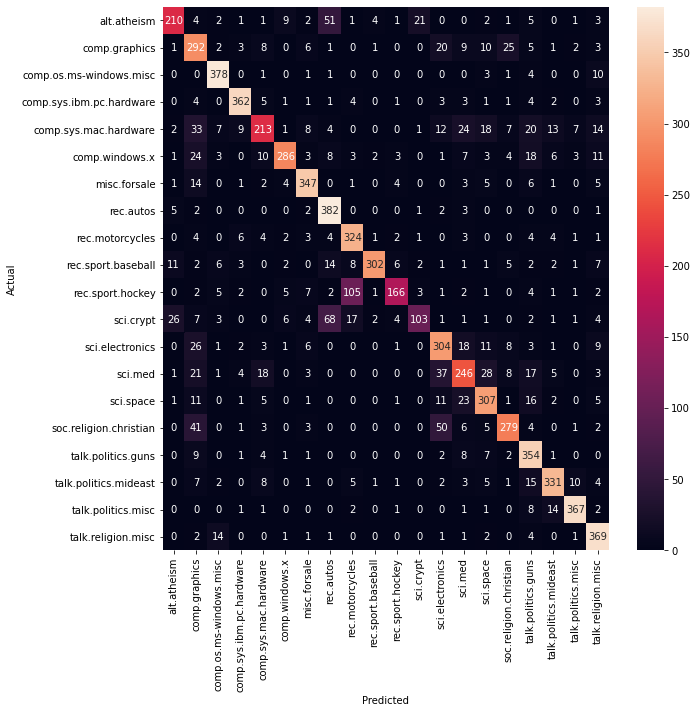

In [51]:
# Plot the confusion matrix
cm = metrics.confusion_matrix(df_test.Target, predicted)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=twenty_train.target_names, yticklabels=twenty_train.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
plt.show()

# NOTES

#(Short) Literature overview: 

  The training as well as test dataset was imported using fetch_20newsgroups from sklearn dataset. This dataset is one of the classical dataset for experiments in text applications of machine learning techniques, such as text classification and text clustering. It contains around 18,000 posts belonging to 20 different categories. The training dataset are the posts before a particular date and test dataset posts are ones after the date. The goal here is to use machine learning to classify new posts (from test dataset). 
  After importing the dataset in the Jupyter notebook, first the length of the datasets were checked. Training size is around 60% (11,314) of the total dataset, which is good enough to begin training with. It is also seen that the dataset is balanced. Only news reports from categories 'comp.graphics', 'talk.politics.misc' & 'talk.religion.misc' are fewer compared to other categories. Overall,  the number of articles for each news group given is roughly uniform. (In case of imbalanced classes confusion-matrix is good technique to summarising the performance of a classification algorithm.)
       Counter vectoriser was used, which builds a dictionary of features and transforms documents to feature vector. The number of features in the dataset are 101322.  
       First classifier to use a Multinominal Naive bayesian classifier. This was chosen as it is well known for text classification. Accuracy on the test dataset of around ~82.9% was noted.

#Data exploration: 

 To examine the properties of the dataset by categories, length of text, number of unique letters, unique characters, unique punctuations, uppercase, lowercase were plotted. Only the length of text for each categories was noted to be imbalanced. Longer documents might have higher count values than shorter documents. To avoid these potential discrepancies, TiffTransformer was used after counter vectoriser. Tf–idf stands for “Term Frequency times Inverse Document Frequency”. Term frequencies can be defined as the number of occurrences of each word in a document by the total number of words in the document. To downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus, Term frequency was divided by document frequency. 
        Ignoring stop words in English language such as 'the', 'a', 'an'  improved the accuracy marginally (< 1%). Further cleaning can also be done such as change text to lower case, remove punctuation, remove bad characters. Stemming can also be used. All of it increases the accuracy marginally.
  It was noticed that each post has a subject, email ID etc, lot of metadata. Meta data includes words such as edu, Subject, etc. Whether to include meta data or not, depends on the goal. In this case, meta data was included  in the dataset.


#Experiments:
Results were as follows:
	Multinominal Naive bayesian classifier achieved an accuracy of 82.95%
    SGD classifier achieved an accuracy of 83.04%
    SVC classifier achieved an accuracy of 82.03%%
    
Bert classifier uses a very different approach. Bert uses a trained model which is trained on a very large dataset (1 billion words). This pre-trained knowledge in word embeddings. The idea is that the words that are nearby should have similar representation. A vector is assign to each word and it slides a window over the text. Word vectors re nudged around to minimise surprise. It keeps iterating then it thinks it is 'good enough'. The vector-space word than reorganises itself. 

    For fine tuning, a layer with softmax function was added to the model. Fine tuning is bit slow because the model itself is very large (109 Million weights). Using keras GPU, it takes some minutes for fine tuning on the twenty news groups training dataset. 

    The accuracy it has able to achieve is ~82.84%.      

Conclusion: All 4 classifiers had roughly the same accuracies, therefore any of this classifiers is suitable to solve our problem.   